# Fashion MINST Classification with Logistic Regression
The notebook build LR model to classify the images of Fashion MNIST into 10 classes

## *Question: How does the Logistic Regression model perform on classifying the images of fashion ? Which category does this model make more mistakes?*


### **Result:**

classification accuracy on test set is  0.8414285714285714

Actual label 6: label 6 — Shirt is easier to be classified as label 0 — T-shirt/top, label 2 — Pullover, and label 4 — Coat

Actual label 2: label 2 — Pullover is easier to be classified as label 4 — Coat

Logistic Regression model performs relatively not well on classifying shirt.

### Import required modules

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
import seaborn as sn
sn.set(style='whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### load the data

In [0]:
# load the data
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [0]:
data=fasion_mnist.data
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [0]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [0]:
data[0].shape

(784,)

In [0]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [0]:
images[0].shape

(28, 28)

In [0]:
images[0].max()

255.0

In [0]:
#normalize the value of every pixel into the range of 0 to 1
data = data.astype('float32')

In [0]:
[data.min(), data.max()]

[0.0, 255.0]

In [0]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [0]:
[target.min(), target.max()]

[0, 9]

### show some of the images

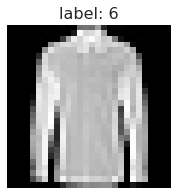

<Figure size 432x288 with 0 Axes>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title('label: ' + str(int(target[n])), fontsize=16)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

### create the training, testing and validating dataset

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (50400, 784) (50400,)
validation: (5600, 784) (5600,)
test: (14000, 784) (14000,)


### train the logistic regression model

### **Answer:**

Logistic regression classification accuracy on test set is 0.8414285714285714

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#set class_weight='balanced'
LR=LogisticRegression(penalty='none', class_weight='balanced', multi_class='multinomial', solver='sag', random_state=0, max_iter=200)
LR.fit(X_train, Y_train)
Y_val_pred=LR.predict(X_val)
confusion_val=confusion_matrix(Y_val, Y_val_pred)
Y_test_pred=LR.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
score_val = LR.score(X_val, Y_val)
score_train = LR.score(X_train, Y_train)
score_test = LR.score(X_test, Y_test)
print('classification accuracy on train set is ', score_train)
print('classification accuracy on validation set is ', score_val)
print('classification accuracy on test set is ', score_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


classification accuracy on train set is  0.8818055555555555
classification accuracy on validation set is  0.8364285714285714
classification accuracy on test set is  0.8414285714285714


In [0]:
# Returns a NumPy Array
# Predict for One Observation (image)
LR.predict(X_test[0].reshape(1,-1))

array([9])

In [0]:
LR.predict(X_test[0:10])

array([9, 5, 6, 6, 6, 2, 4, 7, 6, 6])

In [0]:
predictions = LR.predict(X_test)

### Create the confusion matrix

#### **Answer:**

Actual label 6: label 6 — Shirt is easier to be classified as label 0 — T-shirt/top, label 2 — Pullover, and label 4 — Coat

Actual label 2: label 2 — Pullover is easier to be classified as label 4 — Coat

Logistic Regression model performs relatively not well on classifying shirt.

In [0]:
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[1133   12   28   79    6    1  116    0   14    2]
 [   6 1356   11   37    8    0    3    0    3    0]
 [  24    5 1017   16  185    0  110    1    8    0]
 [  64   24   18 1234   62    0   42    0   11    0]
 [   2    2  113   39 1110    0  114    0    8    0]
 [   0    2    0    0    0 1254    0   65   15   61]
 [ 194    7  160   56  151    0  870    1   33    1]
 [   0    0    0    0    0   52    0 1235    5   62]
 [   9    4   12   11    8   14   26   12 1245    0]
 [   0    1    0    0    0   28    1   50    5 1326]]


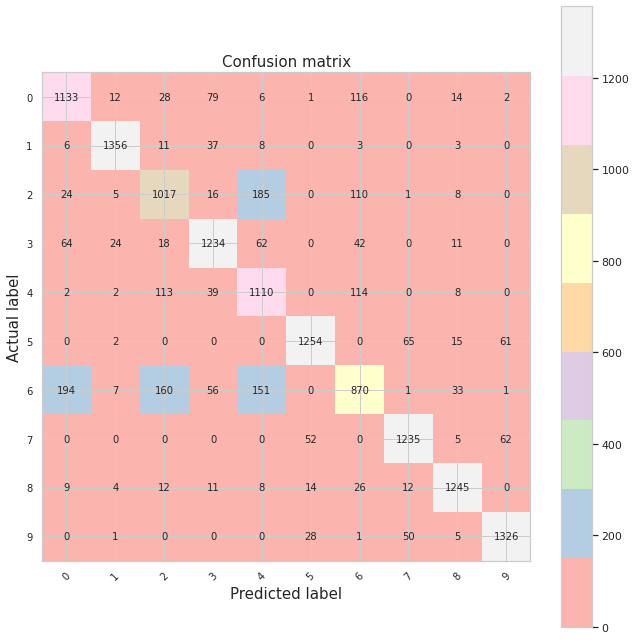

In [0]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):    
  for y in range(height):
    plt.annotate(str(cm[x][y]), xy=(y, x), 
    horizontalalignment='center',
    verticalalignment='center')